In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
pd.__version__

'1.1.5'

In [2]:
df1 = pd.read_excel("OPTSTEMInception-2014.xlsx", engine='openpyxl')

In [3]:
#df2 = pd.read_excel("OPTSTEM1-11-20143-31-2017.xlsx", engine='openpyxl')

In [4]:
#opt = pd.read_stata("acs.dta")

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101019 entries, 0 to 101018
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SCHOOL_NAME                101019 non-null  object 
 1   EMPLR_NAME                 100894 non-null  object 
 2   PROG_CLASS_DESC            101019 non-null  object 
 3   STUDENT_REQ_STATUS_CODE    101019 non-null  object 
 4   STUDENT_REQ_STATUS_DESC    101019 non-null  object 
 5   PRIMARY_PROG_SUBJECT_CODE  101019 non-null  float64
 6   EMP_START_DATE             101018 non-null  object 
 7   EMP_END_DATE               100997 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.2+ MB


In [6]:
df1.head()

,SCHOOL_NAME,EMPLR_NAME,PROG_CLASS_DESC,STUDENT_REQ_STATUS_CODE,STUDENT_REQ_STATUS_DESC,PRIMARY_PROG_SUBJECT_CODE,EMP_START_DATE,EMP_END_DATE
0,Methodist University,Eaton Corporation,Computer Science,C,CANCELLED,11.0701,2008-05-21 00:00:00,2008-08-21 22:03:43
1,"Duke University, Med.Ctr., & Health Sys.",Duke Univ. Dept. of Biology (7/12/12),"Biology/Biological Sciences, General",A,APPROVED,26.0101,2013-07-02 00:00:00,2014-12-01 00:00:00
2,"Duke University, Med.Ctr., & Health Sys.",Augustana College,"Chemistry, General",A,APPROVED,40.0501,2009-07-10 00:00:00,2010-12-09 00:00:00
3,"Duke University, Med.Ctr., & Health Sys.",University of Notre Dame [8/10/2010],"Biology/Biological Sciences, General",A,APPROVED,26.0101,2011-07-15 00:00:00,2012-12-15 00:00:00
4,University of Wisconsin-Madison,Akamai Technologies,"Computer and Information Sciences, General",R,REQUESTED,11.0101,2013-07-01 00:00:00,2014-12-01 00:00:00


In [7]:
dfm=df1.copy()

In [8]:
dfm['startmonth']=pd.to_datetime(dfm['EMP_START_DATE'], errors='coerce')

In [9]:
dfm=dfm.dropna(subset=['startmonth'])

In [10]:
dfm['startmonth']= dfm.startmonth.dt.month

In [11]:
df11=df1.copy()

In [12]:
df11['startyear'] = pd.to_datetime(df11['EMP_START_DATE'], errors='coerce')
df11=df11.dropna(subset=['startyear'])

In [13]:
df11['startyear'] =df11.startyear.dt.year
# I use the start year of the employment because it represents the actual influx of labour into the market

In [14]:
df11['startmonth']=pd.to_datetime(df11['EMP_START_DATE'], errors='coerce')

In [15]:
df11=df11.dropna(subset=['startmonth'])

In [16]:
df11['startmonth']= df11.startmonth.dt.month

In [17]:
df11=df11[['startyear', 'startmonth','PROG_CLASS_DESC', 'PRIMARY_PROG_SUBJECT_CODE','STUDENT_REQ_STATUS_DESC','STUDENT_REQ_STATUS_CODE','SCHOOL_NAME','EMPLR_NAME']]

In [18]:
df11.head()

,startyear,startmonth,PROG_CLASS_DESC,PRIMARY_PROG_SUBJECT_CODE,STUDENT_REQ_STATUS_DESC,STUDENT_REQ_STATUS_CODE,SCHOOL_NAME,EMPLR_NAME
0,2008,5,Computer Science,11.0701,CANCELLED,C,Methodist University,Eaton Corporation
1,2013,7,"Biology/Biological Sciences, General",26.0101,APPROVED,A,"Duke University, Med.Ctr., & Health Sys.",Duke Univ. Dept. of Biology (7/12/12)
2,2009,7,"Chemistry, General",40.0501,APPROVED,A,"Duke University, Med.Ctr., & Health Sys.",Augustana College
3,2011,7,"Biology/Biological Sciences, General",26.0101,APPROVED,A,"Duke University, Med.Ctr., & Health Sys.",University of Notre Dame [8/10/2010]
4,2013,7,"Computer and Information Sciences, General",11.0101,REQUESTED,R,University of Wisconsin-Madison,Akamai Technologies


In [19]:
sum_month=df11.loc[df11.STUDENT_REQ_STATUS_CODE=="A"]

In [20]:
sum_month = sum_month.groupby(['startyear', 'startmonth']).STUDENT_REQ_STATUS_CODE.count().reset_index()
sum_month=sum_month.loc[(sum_month.startyear>=2008) & (sum_month.startyear<=2013)]

In [21]:
sum_month.columns=['startyear', 'startmonth', 'num_of_approved']

In [22]:
sum_month.head(10)

,startyear,startmonth,num_of_approved
2,2008,1,2
3,2008,2,2
4,2008,4,5
5,2008,5,219
6,2008,6,257
7,2008,7,282
8,2008,8,185
9,2008,9,190
10,2008,10,470
11,2008,11,93


In [23]:
list(range(2008, 2014))

[2008, 2009, 2010, 2011, 2012, 2013]

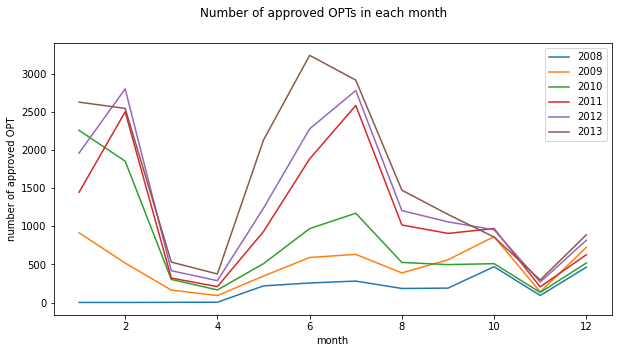

In [24]:
fig,ax = plt.subplots(figsize=(10,5))

for var in list(range(2008, 2014)):
    ax.plot(sum_month.loc[sum_month.startyear==var].startmonth, 
            sum_month.loc[sum_month.startyear==var].num_of_approved, label=var)
ax.set_xlabel("month")
ax.set_ylabel("number of approved OPT")
ax.legend(loc='best')
fig.suptitle("Number of approved OPTs in each month")
plt.show()
#fig.savefig("opt_by_month.png")

In [25]:
cc = sum_month.groupby('startyear').num_of_approved.sum()
cc = cc/2
cc

startyear
2008    1084.5
2009    2969.5
2010    4708.5
2011    6801.0
2012    8032.0
2013    9518.5
Name: num_of_approved, dtype: float64

In [26]:
stem=df11.copy()

In [27]:
stem=stem.assign(occ=stem.PRIMARY_PROG_SUBJECT_CODE)

In [28]:
#convert the discipline code to general occupation categories
def stem_code(x):
    if (x <=3.0601) or ((x>=26.0101) and (x<=26.9999)) or (x==30.0101) or ((x>=30.1001) and (x<=30.2701)) or (x in [41.0101, 42.2701, 42.2702, 42.2704, 42.2706]) or ((x>=42.2708) and (x<=43.0116)) or ((x>=51.1002) and (x<=51.2706)):
        ans=4 #Life science
    elif ((x>=9.0702) and (x<=11.1099)) or (x in [15.1201, 15.1202, 15.1204, 15.1299,30.3001, 30.3101]):
        ans=1 #CS
    elif ((x>=14.0101) and (x<=15.1199)) or ((x>=15.1301) and (x<=15.9999)) or (x in [4.0902, 15.1203]) or ((x>=28.0501) and (x<=30.0601) and (x!= 30.0101)):
        ans=3 #Engineering
    elif ((x>=27.0101) and (x<=27.9999)) or (x==52.1304):
        ans=2 #Math
    elif ((x>=30.3201) and (x<=41.9999) and (x!=41.0101)) or (x in [45.0702, 49.0101]):
        ans=5 #physical science
    else:
        ans=6 #social science
    return ans

In [29]:
# test the function:
stem_code(13.0601)

6

In [30]:
stem.occ=stem.occ.apply(stem_code)

In [31]:
stem.head()

,startyear,startmonth,PROG_CLASS_DESC,PRIMARY_PROG_SUBJECT_CODE,STUDENT_REQ_STATUS_DESC,STUDENT_REQ_STATUS_CODE,SCHOOL_NAME,EMPLR_NAME,occ
0,2008,5,Computer Science,11.0701,CANCELLED,C,Methodist University,Eaton Corporation,1
1,2013,7,"Biology/Biological Sciences, General",26.0101,APPROVED,A,"Duke University, Med.Ctr., & Health Sys.",Duke Univ. Dept. of Biology (7/12/12),4
2,2009,7,"Chemistry, General",40.0501,APPROVED,A,"Duke University, Med.Ctr., & Health Sys.",Augustana College,5
3,2011,7,"Biology/Biological Sciences, General",26.0101,APPROVED,A,"Duke University, Med.Ctr., & Health Sys.",University of Notre Dame [8/10/2010],4
4,2013,7,"Computer and Information Sciences, General",11.0101,REQUESTED,R,University of Wisconsin-Madison,Akamai Technologies,1


In [32]:
summary = stem.groupby(['startyear', 'occ', 
                        'STUDENT_REQ_STATUS_CODE']).STUDENT_REQ_STATUS_DESC.count().reset_index()
approved = summary.loc[summary.STUDENT_REQ_STATUS_CODE=='A']

In [33]:
approved.columns=['startyear', 'occ_stem_cat','drop', 'num_of_approved']

In [34]:
approved=approved[['startyear', 'occ_stem_cat', 'num_of_approved']]

In [35]:
approved=approved.loc[(approved.startyear>=2008) & (approved.startyear<=2013)]

In [36]:
approved.head()

,startyear,occ_stem_cat,num_of_approved
2,2008,1,634
8,2008,2,86
12,2008,3,1166
18,2008,4,154
24,2008,5,102


In [37]:
unshifted =approved.copy()

In [38]:
unshifted.columns = ['year', 'occ_stem_cat', 'unshifted_occ']

In [39]:
addon_un= pd.DataFrame({'year': range(2008, 2014), 'occ_stem_cat':0, 'unshifted_occ':0})
addon_un

,year,occ_stem_cat,unshifted_occ
0,2008,0,0
1,2009,0,0
2,2010,0,0
3,2011,0,0
4,2012,0,0
5,2013,0,0


In [40]:
unshifted = pd.concat([unshifted, addon_un]).sort_values(by=['year', 'occ_stem_cat'])

In [41]:
unshifted

,year,occ_stem_cat,unshifted_occ
0,2008,0,0
2,2008,1,634
8,2008,2,86
12,2008,3,1166
18,2008,4,154
24,2008,5,102
30,2008,6,27
1,2009,0,0
35,2009,1,1858
41,2009,2,182


In [42]:
shifted=approved.assign(year=approved.startyear +1)

In [43]:
shifted=shifted[['year', 'occ_stem_cat', 'num_of_approved']]

In [44]:
addon= pd.DataFrame({'year': range(2009, 2014), 'occ_stem_cat':0, 'num_of_approved':0})
addon

,year,occ_stem_cat,num_of_approved
0,2009,0,0
1,2010,0,0
2,2011,0,0
3,2012,0,0
4,2013,0,0


In [45]:
shifted=shifted.loc[shifted.year !=2014]

In [46]:
shifted = pd.concat([shifted, addon])

In [47]:
shifted = shifted.sort_values(by=['year', 'occ_stem_cat']).reset_index(drop=True)

In [48]:
shifted.columns = ['year', 'occ_stem_cat', 'shifted_occ']

In [49]:
shifted

,year,occ_stem_cat,shifted_occ
0,2009,0,0
1,2009,1,634
2,2009,2,86
3,2009,3,1166
4,2009,4,154
5,2009,5,102
6,2009,6,27
7,2010,0,0
8,2010,1,1858
9,2010,2,182


In [50]:
#unshifted.to_stata('unshifted.dta')

In [51]:
#shifted.to_stata('shifted.dta')

In [52]:
df11.PROG_CLASS_DESC.nunique()

626

In [53]:
df11.PRIMARY_PROG_SUBJECT_CODE.nunique()

516

In [54]:
tab11 = df11.groupby('PRIMARY_PROG_SUBJECT_CODE').PROG_CLASS_DESC.agg(['nunique', 'unique']).reset_index()

In [55]:
tab11.columns = ['PRIMARY_PROG_SUBJECT_CODE', 'unique_num', 'unique_list']

In [56]:
tab11.loc[tab11.unique_num !=1]

,PRIMARY_PROG_SUBJECT_CODE,unique_num,unique_list
11,1.1002,2,"[Food Technology and Processing (NEW), Food Te..."
23,3.0103,2,"[Environmental Studies (NEW), Environmental St..."
24,3.0104,2,"[Environmental Science (NEW), Environmental Sc..."
35,4.0201,2,"[Architecture (BArch, BA/BS, MArch, MA/MS, PhD..."
44,9.0101,2,[Communication Studies/Speech Communication an...
...,...,...,...
466,51.2211,2,"[Health Services Administration (NEW), Health ..."
470,51.2505,2,"[Veterinary Pathology and Pathobiology (Cert, ..."
487,52.0209,2,[Transportation/Transportation Management (NEW...
505,52.1301,2,"[Management Science, Management Science, General]"


In [57]:
num =df11.groupby(['startyear', 'PRIMARY_PROG_SUBJECT_CODE', 
                   'STUDENT_REQ_STATUS_DESC']).STUDENT_REQ_STATUS_CODE.count().reset_index()

In [58]:
num =num.sort_values(by= ['startyear','PRIMARY_PROG_SUBJECT_CODE'])

In [59]:
num

,startyear,PRIMARY_PROG_SUBJECT_CODE,STUDENT_REQ_STATUS_DESC,STUDENT_REQ_STATUS_CODE
0,2007,11.0701,APPROVED,1
1,2007,14.1001,APPROVED,1
2,2008,1.0901,APPROVED,1
3,2008,1.0901,DENIED,1
4,2008,1.1001,DENIED,1
...,...,...,...,...
4234,2015,52.1399,PENDING,5
4235,2015,52.1399,REQUESTED,7
4236,2016,11.0701,REQUESTED,1
4237,2016,14.0801,CANCELLED,1


In [60]:
num.STUDENT_REQ_STATUS_CODE.max()

2908

In [61]:
df11.groupby('startyear').PROG_CLASS_DESC.count()

startyear
2007        2
2008     2845
2009     6768
2010    10603
2011    14694
2012    17142
2013    20815
2014    23985
2015     4159
2016        2
2017        1
Name: PROG_CLASS_DESC, dtype: int64

In [62]:
unshifted

,year,occ_stem_cat,unshifted_occ
0,2008,0,0
2,2008,1,634
8,2008,2,86
12,2008,3,1166
18,2008,4,154
24,2008,5,102
30,2008,6,27
1,2009,0,0
35,2009,1,1858
41,2009,2,182


In [63]:
data = unshifted.loc[unshifted.occ_stem_cat>0]

In [75]:
data.head()
data.loc[data.year==2009].sort_values(by='unshifted_occ')

,year,occ_stem_cat,unshifted_occ
62,2009,6,41
41,2009,2,182
57,2009,5,243
52,2009,4,384
35,2009,1,1858
46,2009,3,3231


In [70]:
list(range(1,6))

[1, 2, 3, 4, 5]

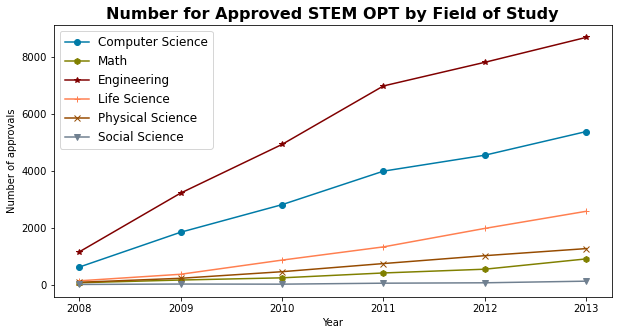

In [80]:
plt.figure(figsize=(10,5))
plt.plot(data.loc[data.occ_stem_cat==1].year, data.loc[data.occ_stem_cat==1].unshifted_occ, 
         color='#007BA7', marker='o', label="Computer Science") #2 Cerulean
plt.plot(data.loc[data.occ_stem_cat==2].year, data.loc[data.occ_stem_cat==2].unshifted_occ, 
         color='#808000', marker='h', label="Math") #5 olive
plt.plot(data.loc[data.occ_stem_cat==3].year, data.loc[data.occ_stem_cat==3].unshifted_occ, 
         color='#800000', marker='*', label="Engineering") #1 maroon
plt.plot(data.loc[data.occ_stem_cat==4].year, data.loc[data.occ_stem_cat==4].unshifted_occ, 
         color='#FF7F50', marker='+', label="Life Science") #4 coral
plt.plot(data.loc[data.occ_stem_cat==5].year, data.loc[data.occ_stem_cat==5].unshifted_occ, 
         color='#964B00', marker='x', label="Physical Science")#5 brown
plt.plot(data.loc[data.occ_stem_cat==6].year, data.loc[data.occ_stem_cat==6].unshifted_occ, 
         color='#708090', marker='v', label="Social Science") #6 grey
plt.legend(loc="best", fontsize='large')
plt

plt.title("Number for Approved STEM OPT by Field of Study", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of approvals")
plt.savefig("STEM OPT by field of study")
plt.show()